# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [3]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return [a[i] * b[i] for i in range(len(a))]  # ⬅️✏️

---

In [4]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [5]:
# Define a scalar: bias b
my_b = -5

In [6]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x, weights)) + bias  # ⬅️✏️

---

In [7]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [8]:
# Import exp() function (safe on lists)
from numpy import exp

In [9]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1.0 / (1 + exp(-z))  # ⬅️✏️

---

In [10]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [11]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

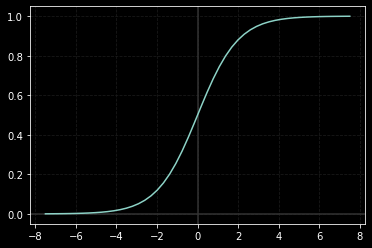

In [12]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [13]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(linear_neuron(x, weights, bias))  # ⬅️✏️

---

In [14]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [18]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return neuron(x, [10.02, 10.02], -5.01) > 0.5  # ⬅️✏️

---

In [19]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [20]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [21]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return neuron(x, [5.2, 5.2], -10.3) > 0.5  # ⬅️✏️

---

In [22]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [23]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    return neuron(x, [-10.0], 5.1) > 0.5  # ⬅️✏️

---

In [24]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [25]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    x1, x2 = x[0], x[1]
    x1_not = not_neuron([x[0]])
    x2_not = not_neuron([x[1]])
    part1 = and_neuron([x1_not, x2])
    part2 = and_neuron([x1, x2_not])
    return or_neuron([part1, part2])  # ⬅️✏️

---

In [26]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [32]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️
def half_adder_neuron(x):
    """
    Return sum and carry in a list corresponding to [carry, sum]
    """
    return [int(and_neuron(x)), int(xor_neuron(x))]

In [33]:
print('Checking Half-adder neuron output')
for my_x in my_x_collection:
    print(my_x, half_adder_neuron(my_x))

Checking Half-adder neuron output
[0, 0] [0, 0]
[0, 1] [0, 1]
[1, 0] [0, 1]
[1, 1] [1, 0]


---

![Adder](res/adder_circuit.png)

In [41]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️
def full_adder_neuron(x):
    """
    Return sum and carry in a list corresponding to [carry, sum]
    """
    first_half_adder_result = half_adder_neuron(x[:2])
    carry_half_adder_1 = first_half_adder_result[0]
    sum_half_adder_1 = first_half_adder_result[1]
    second_half_adder_result = half_adder_neuron([sum_half_adder_1, x[2]])
    carry_half_adder_2 = second_half_adder_result[0]
    sum_half_adder_2 = second_half_adder_result[1]
    carry_output = or_neuron([carry_half_adder_1, carry_half_adder_2])
    
    return [sum_half_adder_2, int(carry_output)]

In [42]:
# corresponding element: A, B, Cin
my_x_collection = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
]

print('Checking Full-adder neuron output')
for my_x in my_x_collection:
    print(my_x, full_adder_neuron(my_x))

Checking Full-adder neuron output
[0, 0, 0] [0, 0]
[0, 1, 0] [1, 0]
[1, 0, 0] [1, 0]
[1, 1, 0] [0, 1]
[0, 0, 1] [1, 0]
[0, 1, 1] [0, 1]
[1, 0, 1] [0, 1]
[1, 1, 1] [1, 1]


---